Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Strojno učenje 1 2023/2024  
http://www.fer.unizg.hr/predmet/struce1

------------------------------

### Druga laboratorijska vježba: Linearni diskriminativni modeli i logistička regresija

*Verzija: 1.1 (ispravljena greška u tekstu prvog zadatka)  
Zadnji put ažurirano: 1. 10. 2021.*

(c) 2015-2023 Jan Šnajder, Domagoj Alagić  

Rok za predaju: **5. studenog 2023. u 23:59h**

------------------------------

### Pravila predaje
Predajom vježbe potvrđujete sljedeće točke:
1. Niste od drugoga primili pomoć pri rješavanju vježbe;
2. Atribuirali ste dijelove koda koji su preuzeti s interneta referencirajući ih u komentarima;
3. Niste koristili dijelove koda s interneta koji su specifični za laboratorijsku vježbu;
4. Niste koristili UI-asistente za kodiranje kao npr. GitHub Copilot (uključivo alate generativne UI, kao što je ChatGPT).

**Povreda bilo kojeg od gornjih pravila smatra se prekršajem te povlači akademske sankcije.**

### Upute

Druga laboratorijska vježba sastoji se od šest zadataka. U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [1]:
# Učitaj osnovne biblioteke...
import sklearn
import matplotlib.pyplot as plt
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
def plot_2d_clf_problem(X, y, h=None):
    '''
    Plots a two-dimensional labeled dataset (X,y) and, if function h(x) is given, 
    the decision surfaces.
    '''
    assert X.shape[1] == 2, "Dataset is not two-dimensional"
    if h!=None : 
        # Create a mesh to plot in
        r = 0.04  # mesh resolution
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, r),
                             np.arange(y_min, y_max, r))
        XX=np.c_[xx.ravel(), yy.ravel()]
        try:
            Z_test = h(XX)
            if Z_test.shape == ():
                # h returns a scalar when applied to a matrix; map explicitly
                Z = np.array(list(map(h,XX)))
            else :
                Z = Z_test
        except ValueError:
            # can't apply to a matrix; map explicitly
            Z = np.array(list(map(h,XX)))
        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, cmap=plt.cm.Pastel1)

    # Plot the dataset
    plt.scatter(X[:,0],X[:,1], c=y, cmap=plt.cm.tab20b, marker='o', s=50);

### 1. Linearna regresija kao klasifikator

U prethodnoj laboratorijskoj vježbi koristili smo model linearne regresije za, naravno, regresiju. Međutim, model linearne regresije može se koristiti i za **klasifikaciju**. Iako zvuči pomalo kontraintuitivno, zapravo je dosta jednostavno. Naime, cilj je naučiti funkciju $f(\mathbf{x})$ koja za pozitivne primjere predviđa vrijednost $1$, dok za negativne primjere predviđa vrijednost $0$. U tom slučaju, funkcija $f(\mathbf{x})=0.5$ predstavlja granicu između klasa, tj. primjeri za koje vrijedi $h(\mathbf{x})\geq 0.5$ klasificiraju se kao pozitivni, dok se ostali klasificiraju kao negativni.

Klasifikacija pomoću linearne regresije implementirana je u razredu [`RidgeClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html). U sljedećim podzadatcima **istrenirajte** taj model na danim podatcima i **prikažite** dobivenu granicu između klasa. Pritom isključite regularizaciju ($\alpha = 0$, odnosno `alpha=0`). Također i ispišite **točnost** vašeg klasifikacijskog modela (smijete koristiti funkciju [`metrics.accuracy_score`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)). Skupove podataka vizualizirajte korištenjem pomoćne funkcije ``plot_clf_problem(X, y, h=None)`` koja je dana na početku ove bilježnice. `X` i `y` predstavljaju ulazne primjere i oznake, dok `h` predstavlja funkciju predikcije modela (npr. `model.predict`). 

U ovom zadatku cilj je razmotriti kako se klasifikacijski model linearne regresije ponaša na linearno odvojim i neodvojivim podatcima.

In [3]:
from sklearn.linear_model import LinearRegression, RidgeClassifier
from sklearn.metrics import accuracy_score

### (a)

Prvo, isprobajte *ugrađeni* model na linearno odvojivom skupu podataka `seven` ($N=7$).

In [4]:
seven_X = np.array([[2,1], [2,3], [1,2], [3,2], [5,2], [5,4], [6,3]])
seven_y = np.array([1, 1, 1, 1, 0, 0, 0])

classification accuracy: 1.0


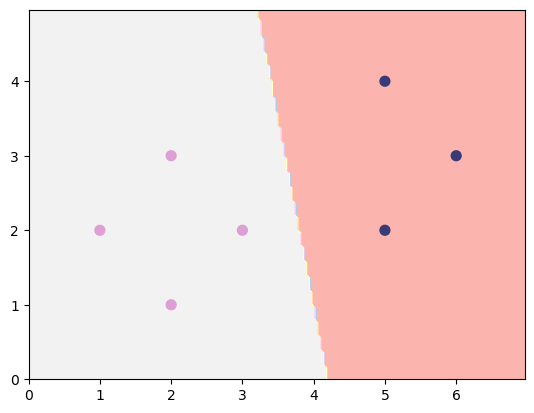

In [5]:
# Vaš kôd ovdje
clf = RidgeClassifier(alpha=0.0).fit(seven_X, seven_y)
h = lambda X : clf.predict(X)
print("classification accuracy:", accuracy_score(y_true=seven_y, y_pred=h(seven_X)))
plot_2d_clf_problem(seven_X, seven_y, h)

Kako bi se uvjerili da se u isprobanoj implementaciji ne radi o ničemu doli o običnoj linearnoj regresiji, napišite kôd koji dolazi do jednakog rješenja korištenjem isključivo razreda [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). Funkciju za predikciju, koju predajete kao treći argument `h` funkciji `plot_2d_clf_problem`, možete definirati lambda-izrazom: `lambda x : model.predict(x) >= 0.5`.

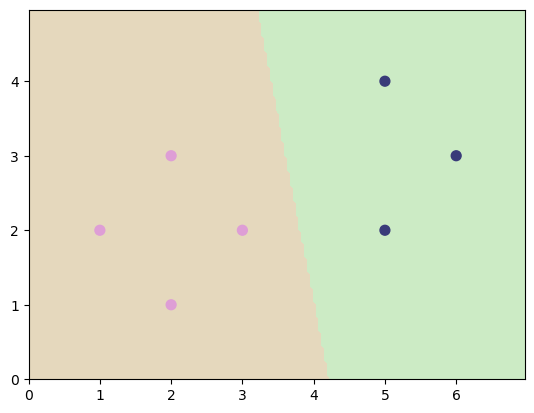

In [6]:
# Vaš kôd ovdje
h = lambda x : lin_reg.predict(x) >= 0.5
lin_reg = LinearRegression().fit(seven_X, seven_y)
plot_2d_clf_problem(seven_X, seven_y, h)

**Q:** Kako bi bila definirana granica između klasa ako bismo koristili oznake klasa $-1$ i $1$ umjesto $0$ i $1$?

### (b)  

Probajte isto na linearno odvojivom skupu podataka `outlier` ($N=8$):

In [7]:
outlier_X = np.append(seven_X, [[12,8]], axis=0)
outlier_y = np.append(seven_y, 0)

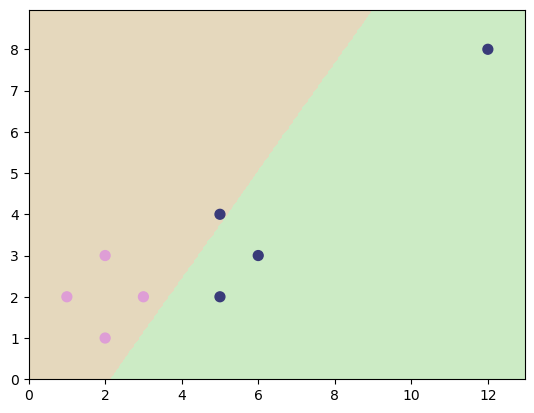

In [8]:
# Vaš kôd ovdje
lin_reg = LinearRegression().fit(outlier_X, outlier_y)
plot_2d_clf_problem(outlier_X, outlier_y, h)

**Q:** Zašto model ne ostvaruje potpunu točnost iako su podatci linearno odvojivi?

### (c)  

Završno, probajte isto na linearno neodvojivom skupu podataka `unsep` ($N=8$):

In [9]:
unsep_X = np.append(seven_X, [[2,2]], axis=0)
unsep_y = np.append(seven_y, 0)

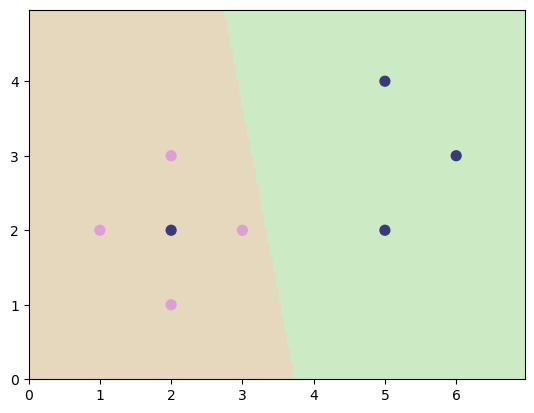

In [10]:
# Vaš kôd ovdje
lin_reg = LinearRegression().fit(unsep_X, unsep_y)
plot_2d_clf_problem(unsep_X, unsep_y, h)

**Q:** Očito je zašto model nije u mogućnosti postići potpunu točnost na ovom skupu podataka. Međutim, smatrate li da je problem u modelu ili u podacima? Argumentirajte svoj stav.

### 2. Višeklasna klasifikacija

Postoji više načina kako se binarni klasifikatori mogu se upotrijebiti za višeklasnu klasifikaciju. Najčešće se koristi shema tzv. **jedan-naspram-ostali** (engl. *one-vs-rest*, OVR), u kojoj se trenira po jedan klasifikator $h_j$ za svaku od $K$ klasa. Svaki klasifikator $h_j$ trenira se da razdvaja primjere klase $j$ od primjera svih drugih klasa, a primjer se klasificira u klasu $j$ za koju je $h_j(\mathbf{x})$ maksimalan.

Pomoću funkcije [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) generirajte slučajan dvodimenzijski skup podataka od tri klase i prikažite ga koristeći funkciju `plot_2d_clf_problem`. Radi jednostavnosti, pretpostavite da nema redundantnih značajki te da je svaka od klasa "zbijena" upravo u jednu grupu.

Trenirajte tri binarna klasifikatora, $h_1$, $h_2$ i $h_3$ te prikažite granice između klasa (tri grafikona). Zatim definirajte $h(\mathbf{x})=\mathrm{argmax}_j h_j(\mathbf{x})$  (napišite svoju funkciju `predict` koja to radi) i prikažite granice između klasa za taj model. Zatim se uvjerite da biste identičan rezultat dobili izravno primjenom modela `RidgeClassifier`, budući da taj model za višeklasan problem zapravo interno implementira shemu jedan-naspram-ostali.

**Q:** Alternativna shema jest ona zvana **jedan-naspram-jedan** (engl, *one-vs-one*, OVO). Koja je prednost sheme OVR nad shemom OVO? A obratno?

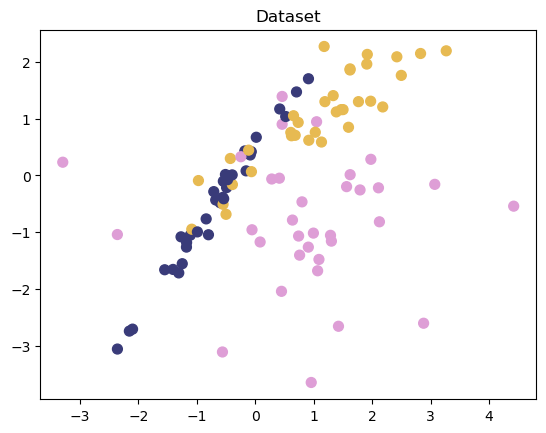

In [11]:
from sklearn.datasets import make_classification

# Vaš kôd ovdje
X, y = make_classification(n_features=2, n_informative=2, n_redundant=0, n_classes=3, n_clusters_per_class=1)
plt.title('Dataset')
plot_2d_clf_problem(X, y)

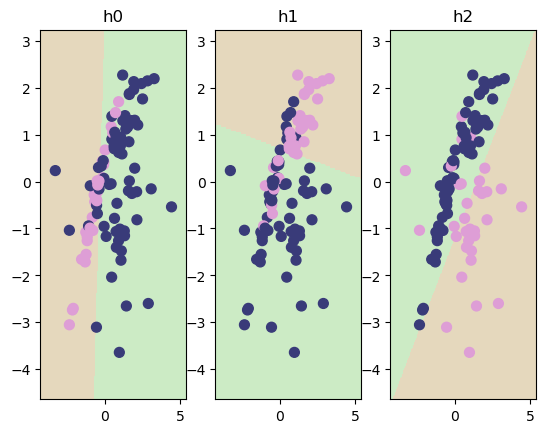

In [12]:
h = lambda X : clf.predict(X) >= 0.5
clfs = []

for i in range(0, 3):
    y_i = np.int64((y == i))
    clf = LinearRegression().fit(X, y_i)
    clfs.append(clf) # spremamo klasifikatore za kasnije
    plt.subplot(1, 3, i + 1) # https://www.w3schools.com/python/matplotlib_subplot.asp
    plot_2d_clf_problem(X, y_i, h)
    plt.title('h' + str(i))
plt.subplots_adjust(figsize(15,5)) # https://saturncloud.io/blog/how-to-change-subplot-size-in-python-matplotlib-a-guide/

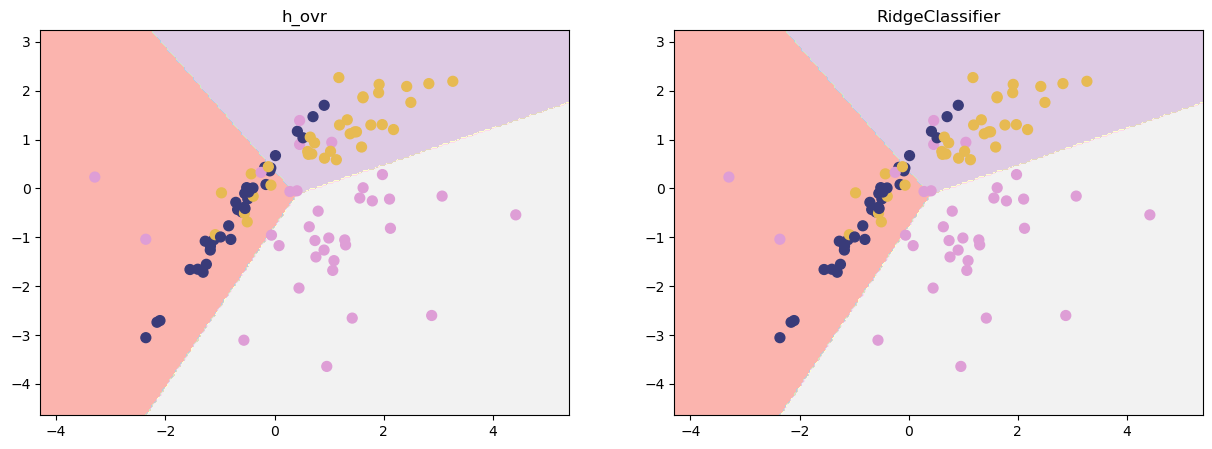

In [13]:
h_max = lambda X: np.argmax([clf.predict(X) for clf in clfs], axis=0)

plt.subplot(1, 2, 1)
plt.title('h_ovr')
plot_2d_clf_problem(X, y, h_max)

h = lambda X: clf.predict(X)
clf = RidgeClassifier(alpha=0.0).fit(X, y)
plt.subplot(1, 2, 2)
plt.title('RidgeClassifier')
plot_2d_clf_problem(X, y, h)
plt.subplots_adjust(figsize(15,5)) # https://saturncloud.io/blog/how-to-change-subplot-size-in-python-matplotlib-a-guide/

### 3. Logistička regresija

Ovaj zadatak bavi se probabilističkim diskriminativnim modelom, **logističkom regresijom**, koja je, unatoč nazivu, klasifikacijski model.

Logistička regresija tipičan je predstavnik tzv. **poopćenih linearnih modela** koji su oblika: $h(\mathbf{x})=f(\mathbf{w}^\intercal\tilde{\mathbf{x}})$. Logistička funkcija za funkciju $f$ koristi tzv. **logističku** (sigmoidalnu) funkciju $\sigma (x) = \frac{1}{1 + \textit{exp}(-x)}$.

### (a)  

Definirajte logističku (sigmoidalnu) funkciju $\mathrm{sigm}(x)=\frac{1}{1+\exp(-\alpha x)}$ i prikažite je za $\alpha\in\{1,2,4\}$.

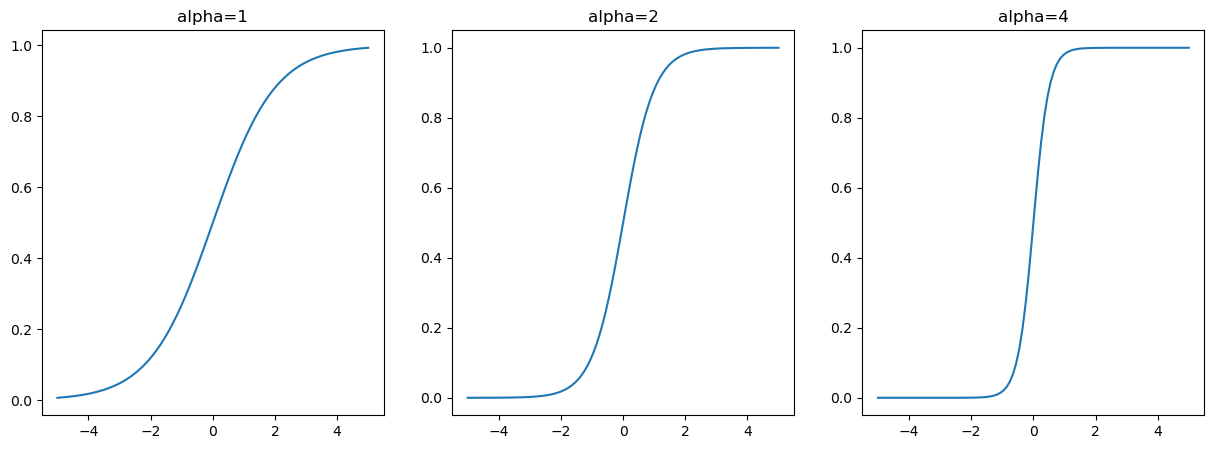

In [14]:
# Vaš kôd ovdje
def sigm(x, alpha):
    return 1 / (1 + np.exp(-alpha * x))

alphas = [1, 2, 4]
values = []
x = np.linspace(-5, 5, 100)
for i in range(len(alphas)):
    subplot(1, 3, i + 1)
    plt.title('alpha=' + str(alphas[i]))
    plt.plot(x, sigm(x, alphas[i]))

**Q**: Zašto je sigmoidalna funkcija prikladan izbor za aktivacijsku funkciju poopćenoga linearnog modela? 
</br>

**Q**: Kakav utjecaj ima faktor $\alpha$ na oblik sigmoide? Što to znači za model logističke regresije (tj. kako izlaz modela ovisi o normi vektora težina $\mathbf{w}$)?

### (b) 

Implementirajte funkciju 

> `lr_train(X, y, eta=0.01, max_iter=2000, alpha=0, epsilon=0.0001, trace=False)` 

za treniranje modela logističke regresije gradijentnim spustom (*batch* izvedba). Funkcija uzima označeni skup primjera za učenje (matrica primjera `X` i vektor oznaka `y`) te vraća $(n+1)$-dimenzijski vektor težina tipa `ndarray`. Ako je `trace=True`, funkcija dodatno vraća listu (ili matricu) vektora težina $\mathbf{w}^0,\mathbf{w}^1,\dots,\mathbf{w}^k$ generiranih kroz sve iteracije optimizacije, od 0 do $k$. Optimizaciju treba provoditi dok se ne dosegne `max_iter` iteracija, ili kada razlika u pogrešci unakrsne entropije između dviju iteracija padne ispod vrijednosti `epsilon`. Parametar `alpha` predstavlja faktor L2-regularizacije.

Preporučamo definiranje pomoćne funkcije `lr_h(x,w)` koja daje predikciju za primjer `x` uz zadane težine `w`. Također, preporučamo i funkciju `cross_entropy_error(X,y,w)` koja izračunava pogrešku unakrsne entropije modela na označenom skupu `(X,y)` uz te iste težine.

**NB:** Obratite pozornost na to da je način kako su definirane oznake ($\{+1,-1\}$ ili $\{1,0\}$) kompatibilan s izračunom funkcije gubitka u optimizacijskome algoritmu.

In [15]:
from numpy import linalg
from sklearn.preprocessing import PolynomialFeatures

def lr_h(x, w):
    return 1 / (1 + np.exp(-x @ w))

def cross_entropy_error(X, y, w):
    error = 0
    N = X.shape[0]
    h = lr_h(X, w)
    ones = np.ones(N)
    error = 1 / N * np.sum(-y * np.log(h) - (ones-y) * np.log(ones-h))
    return error
    #for x, label in zip(X, y):
    #    h = lr_h(x, w[1:])
    #    if label:
    #        error = error - label * np.log(h)
    #    else:
    #        error = error - (1 - label) * np.log(1 - h)
    
    return 1 / N * error
def lr_train(X, y, eta=0.01, max_iter=2000, alpha=0, epsilon=0.0001, trace=False):
    # Vaš kôd ovdje
    Phi = PolynomialFeatures(degree=1).fit_transform(X)
    trace_list = []
    w_tilda = np.zeros(Phi.shape[1])
    prev_error, curr_error = None, 0
    it = 0
    
    while (prev_error is None) or (it < max_iter and abs(prev_error - curr_error) > epsilon):
        delta_w_tilda = np.zeros(Phi.shape[1])
        for phi, label in zip(Phi, y):
            h = lr_h(phi, w_tilda)
            delta_w_tilda = delta_w_tilda - (h - label) * phi
            
        w_tilda[0] = w_tilda[0] + eta * delta_w_tilda[0]
        w_tilda[1:] = (1 - eta * alpha) * w_tilda[1:] + eta * delta_w_tilda[1:]
        
        prev_error = curr_error
        curr_error = cross_entropy_error(Phi, y, w_tilda)
        
        if trace is True:
            trace_list.append(w_tilda.copy()) # https://stackoverflow.com/questions/53824618/appending-a-numpy-array-to-a-list-strange-happenings
        it += 1
        
    return w_tilda, trace_list

### (c)

Koristeći funkciju `lr_train`, trenirajte model logističke regresije na skupu `seven`, prikažite dobivenu granicu između klasa te  izračunajte pogrešku unakrsne entropije. 

**NB:** Pripazite da modelu date dovoljan broj iteracija.

In [16]:
seven_X = np.array([[2,1], [2,3], [1,2], [3,2], [5,2], [5,4], [6,3]])
seven_y = np.array([1, 1, 1, 1, 0, 0, 0])

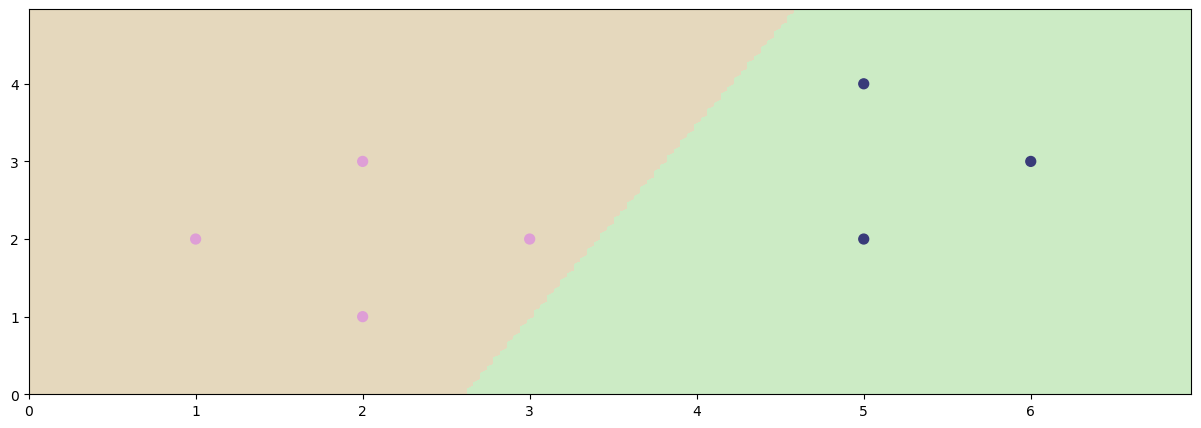

In [17]:
# Vaš kôd ovdje

w, _ = lr_train(seven_X, seven_y, trace=False)

h = lambda X: lr_h(PolynomialFeatures(degree=1).fit_transform(X), w) >= 0.5

plot_2d_clf_problem(seven_X, seven_y, h)

**Q:** Koji kriterij zaustavljanja je aktiviran?

**Q:** Zašto dobivena pogreška unakrsne entropije nije jednaka nuli?

**Q:** Kako biste utvrdili da je optimizacijski postupak doista pronašao hipotezu koja minimizira pogrešku učenja? O čemu to ovisi?

**Q:** Na koji način biste preinačili kôd ako biste htjeli da se optimizacija izvodi stohastičkim gradijentnim spustom (*online learning*)?

### (d)

Prikažite na jednom grafikonu pogrešku unakrsne entropije (očekivanje logističkog gubitka) i pogrešku klasifikacije (očekivanje gubitka 0-1) na skupu `seven` kroz iteracije optimizacijskog postupka. Koristite trag težina funkcije `lr_train` iz zadatka (b) (opcija `trace=True`). Na drugom grafikonu prikažite pogrešku unakrsne entropije kao funkciju broja iteracija za različite stope učenja, $\eta\in\{0.005,0.01,0.05,0.1\}$.

In [18]:
from sklearn.metrics import zero_one_loss

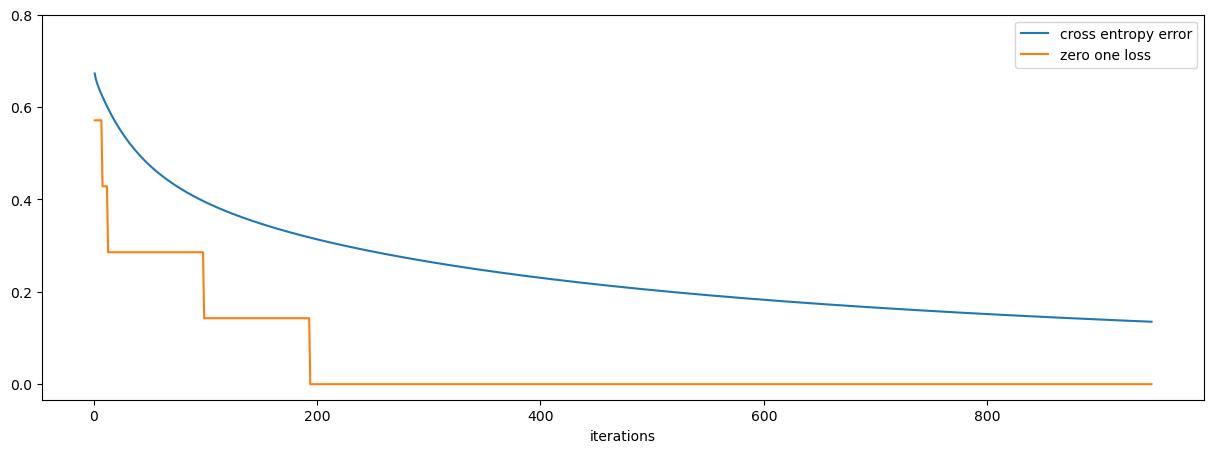

In [19]:
# Vaš kôd ovdje
w, trace_list = lr_train(seven_X, seven_y, trace=True)

iterations = np.arange(1, len(trace_list) + 1)
l_ce_iterations = []
l_01_iterations = []
Phi = PolynomialFeatures(degree=1).fit_transform(seven_X)

for weights in trace_list:
    h = lr_h(x=Phi, w=weights)
    l_ce_iterations.append(cross_entropy_error(X=Phi, y=seven_y , w=weights))
    h = np.int64(h >= 0.5)
    #print(h)
    l_01_iterations.append(zero_one_loss(y_true=seven_y, y_pred=h))

plt.plot(iterations, l_ce_iterations, label='cross entropy error')
plt.plot(iterations, l_01_iterations, label='zero one loss')
plt.xlabel('iterations')
plt.yticks(np.arange(0, 1, 0.2)) #https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.yticks.html
plt.legend()
plt.show()

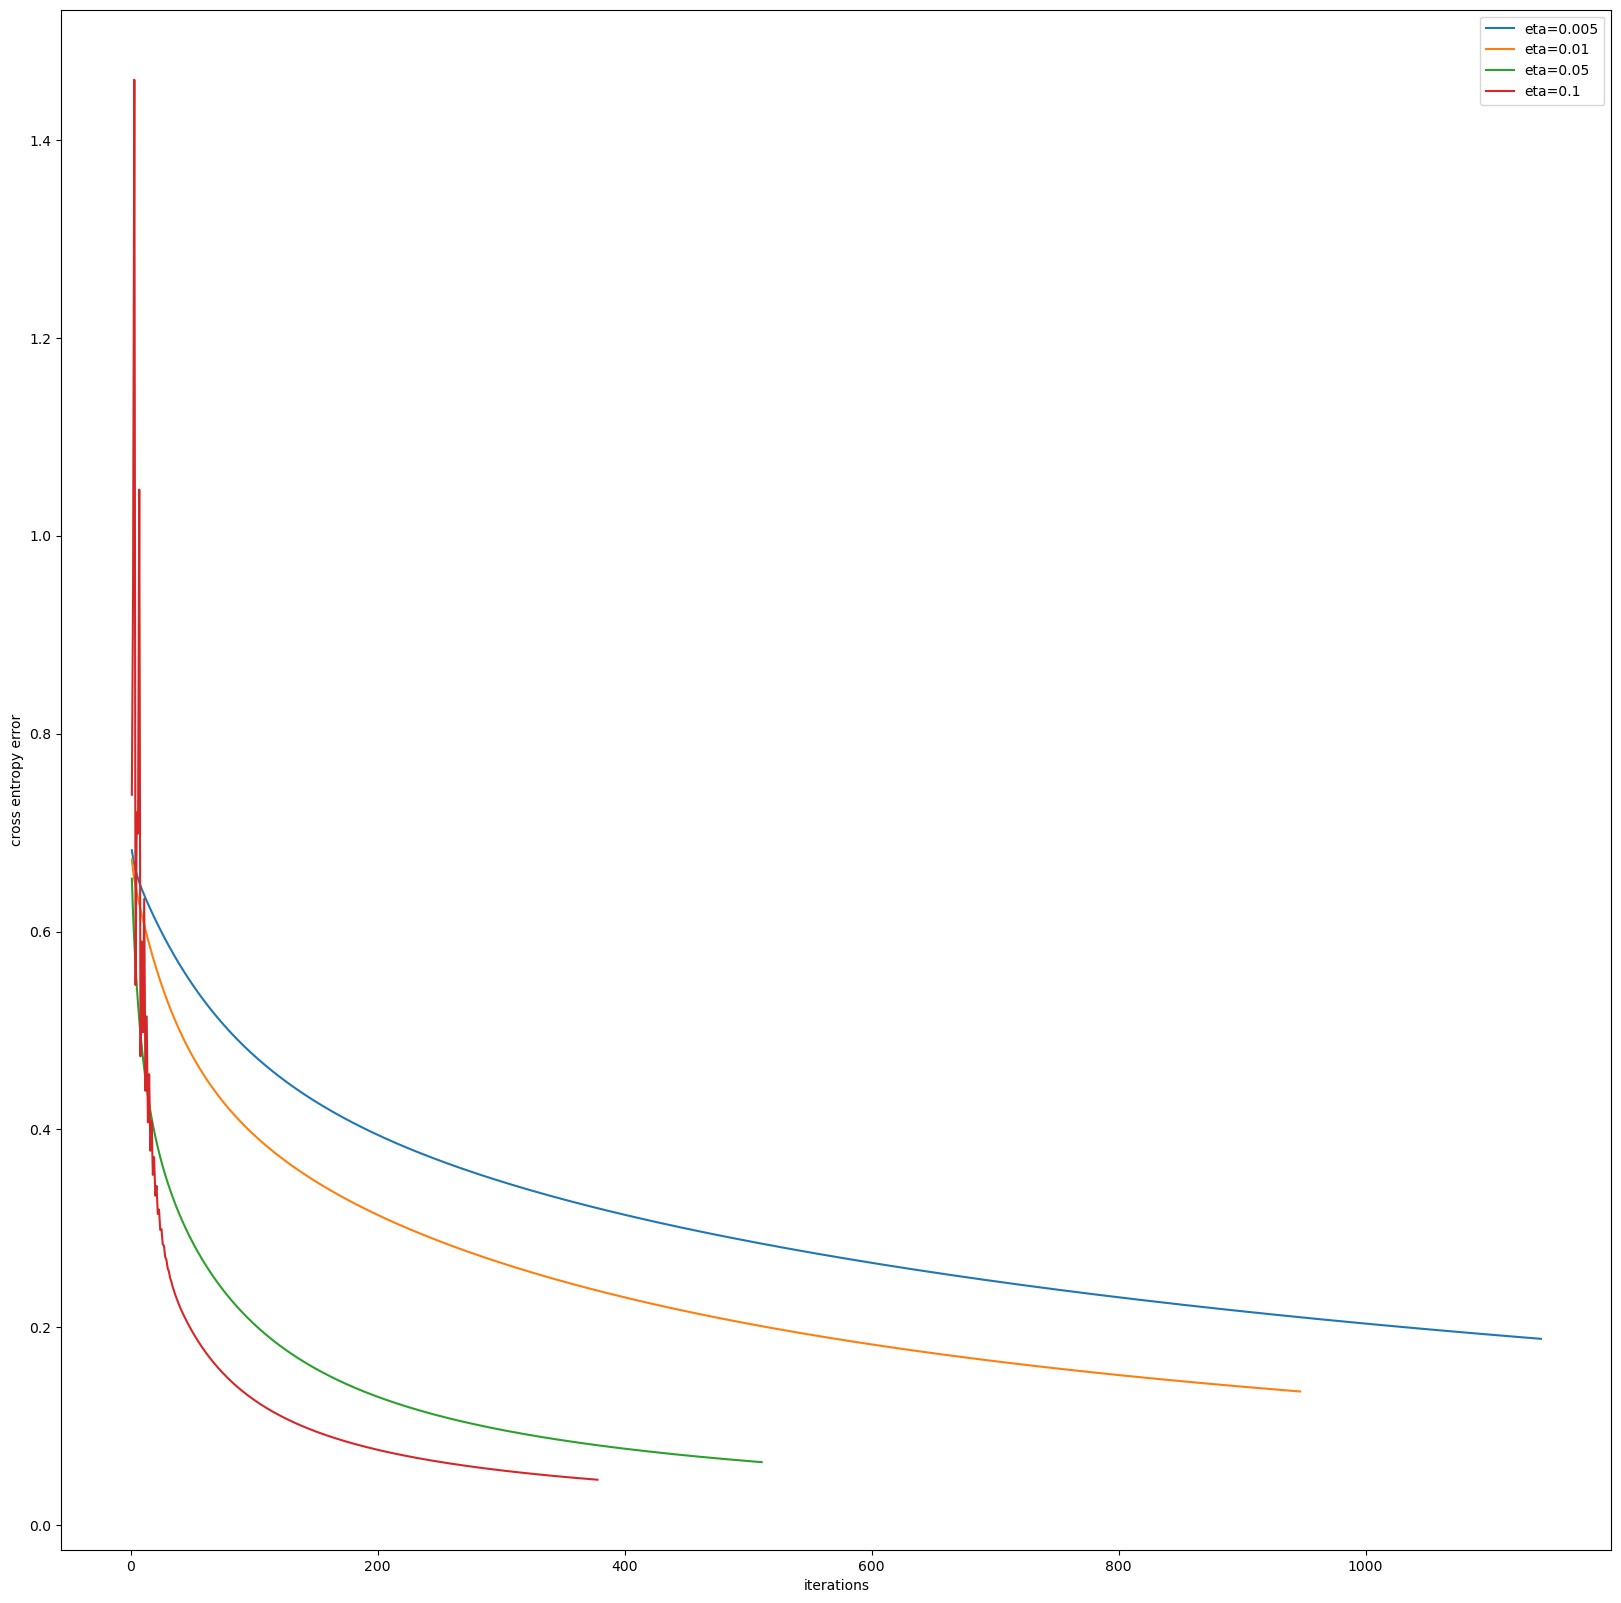

In [39]:
etas = [0.005, 0.01, 0.05, 0.1]
Phi = PolynomialFeatures(degree=1).fit_transform(seven_X)

for eta in etas:
    w, trace_list = lr_train(seven_X, seven_y, eta=eta, trace=True)
    iterations = np.arange(1, len(trace_list) + 1)
    l_ce_iterations = []
    for weights in trace_list:
        h = lr_h(x=Phi, w=weights)
        l_ce_iterations.append(cross_entropy_error(X=Phi, y=seven_y , w=weights))
    plt.plot(iterations, l_ce_iterations, label='eta=' + str(eta))

plt.ylabel('cross entropy error')
plt.xlabel('iterations')
plt.legend()
plt.show()


**Q:** Zašto je pogreška unakrsne entropije veća od pogreške klasifikacije? Je li to uvijek slučaj kod logističke regresije i zašto?

**Q:** Koju stopu učenja $\eta$ biste odabrali i zašto?

### (e)

Upoznajte se s klasom [`linear_model.LogisticRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) koja implementira logističku regresiju. Usporedite rezultat modela na skupu `seven` s rezultatom koji dobivate pomoću vlastite implementacije algoritma.

**NB:** Kako ugrađena implementacija koristi naprednije verzije optimizacije funkcije, vrlo je vjerojatno da Vam se rješenja neće poklapati, ali generalne performanse modela bi trebale. Ponovno, pripazite na broj iteracija i snagu regularizacije.

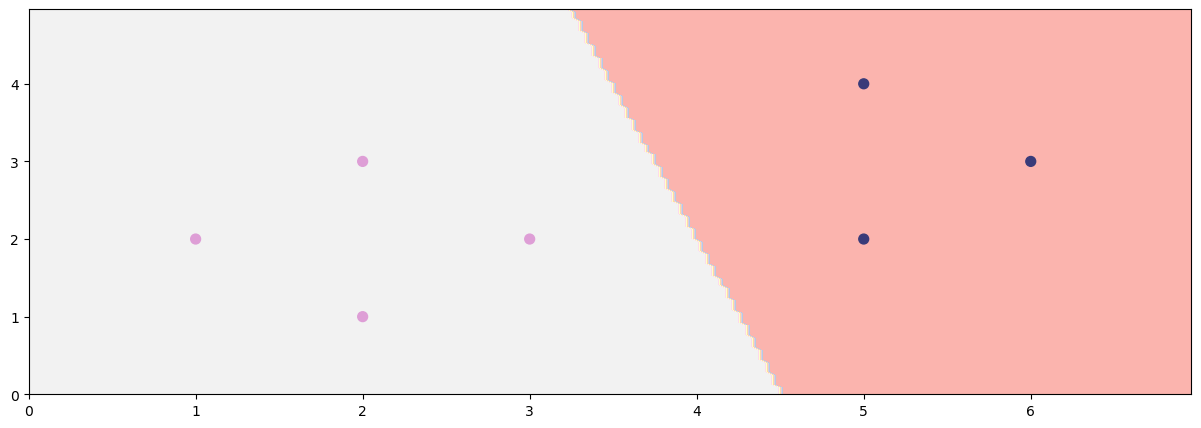

In [21]:
from sklearn.linear_model import LogisticRegression

# Vaš kôd ovdje
clf = LogisticRegression(penalty='l2', tol=0.0001, max_iter=2000)
clf.fit(seven_X, seven_y)
h = lambda X: clf.predict(X)

plot_2d_clf_problem(seven_X, seven_y, h)

### 4. Analiza logističke regresije

### (a)

Koristeći ugrađenu implementaciju logističke regresije, provjerite kako se logistička regresija nosi s vrijednostima koje odskaču. Iskoristite skup `outlier`. Prikažite granicu između klasa.

In [22]:
outlier_X = np.append(seven_X, [[12,8]], axis=0)
outlier_y = np.append(seven_y, 0)

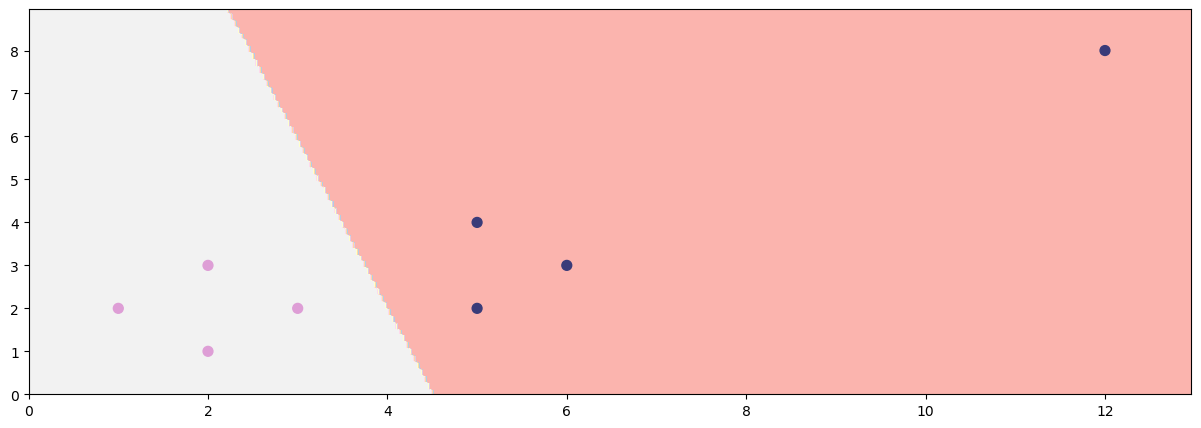

In [23]:
# Vaš kôd ovdje
clf = LogisticRegression(penalty='l2', tol=0.0001, max_iter=2000)
clf.fit(outlier_X, outlier_y)
plot_2d_clf_problem(outlier_X, outlier_y, h)

**Q:** Zašto se rezultat razlikuje od onog koji je dobio model klasifikacije linearnom regresijom iz prvog zadatka?

### (b)

Trenirajte model logističke regresije na skupu `seven` te na dva odvojena grafikona prikažite, kroz iteracije optimizacijskoga algoritma, (1) izlaz modela $h(\mathbf{x})$ za svih sedam primjera te (2) vrijednosti težina $w_0$, $w_1$, $w_2$.

In [24]:
def create_weight_dict(w, W):
    weight_dict = {}
    for key in range(len(w)):
        weight_dict[key] = list(np.array(W)[:, key])
    return weight_dict
    
def create_h_dict(W, Phi):    
    h_dict = {}
    for weight in W:
        h = lr_h(x=Phi, w=weight)
        for j in range(len(h)): 
            if j in h_dict:
                h_dict[j].append(h[j])
            else:
                h_dict[j] = [h[j]]
    return h_dict

In [25]:
# Vaš kôd ovdje
w, W = lr_train(seven_X, seven_y, trace=True)
Phi = PolynomialFeatures(degree=1).fit_transform(seven_X)
iterations = np.arange(1, len(W) + 1)

weight_dict = create_weight_dict(w, W)
h_dict = create_h_dict(W, Phi)

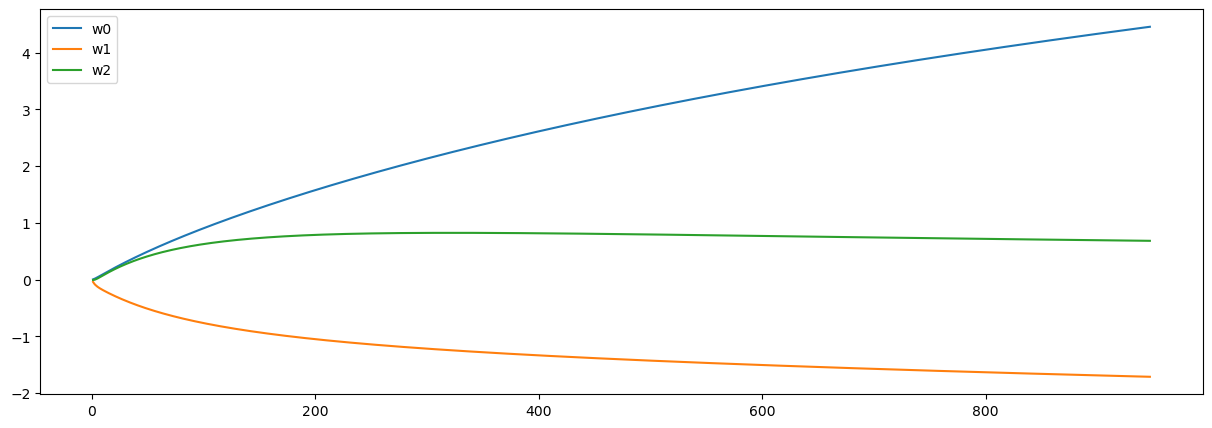

In [26]:
for key in weight_dict.keys():
    plt.plot(iterations, weight_dict[key], label='w' + str(key))
plt.legend()

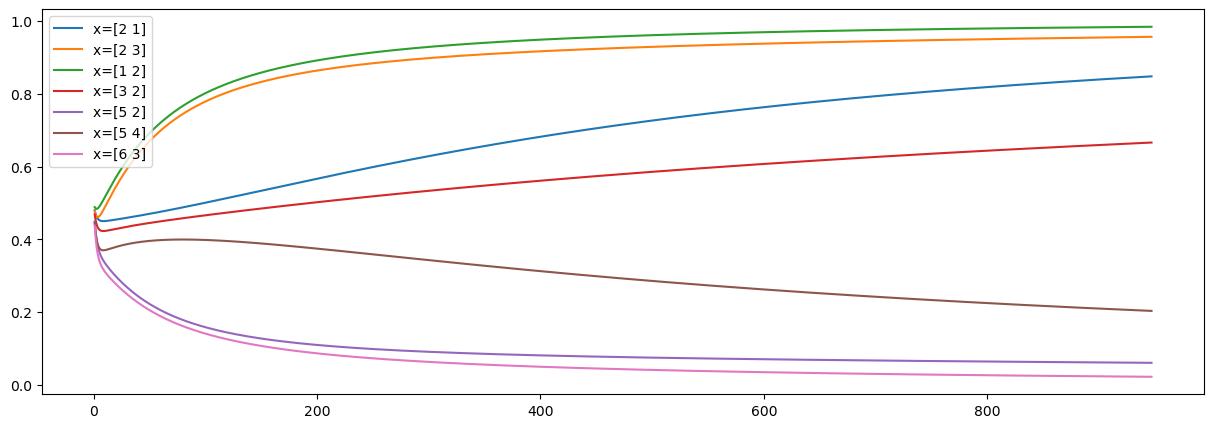

In [27]:
for key in h_dict.keys():
    plt.plot(iterations, h_dict[key], label='x='+ str(seven_X[key][:]))
plt.legend()

### (c)

Ponovite eksperiment iz podzadatka (b) koristeći linearno neodvojiv skup podataka `unsep`.

In [28]:
unsep_X = np.append(seven_X, [[2,2]], axis=0)
unsep_y = np.append(seven_y, 0)

In [29]:
# Vaš kôd ovdje
w, W = lr_train(unsep_X, unsep_y, trace=True)
Phi = PolynomialFeatures(degree=1).fit_transform(unsep_X)
iterations = np.arange(1, len(W) + 1)

unsep_weight_dict = create_weight_dict(w, W)
unsep_h_dict = create_h_dict(W, Phi)

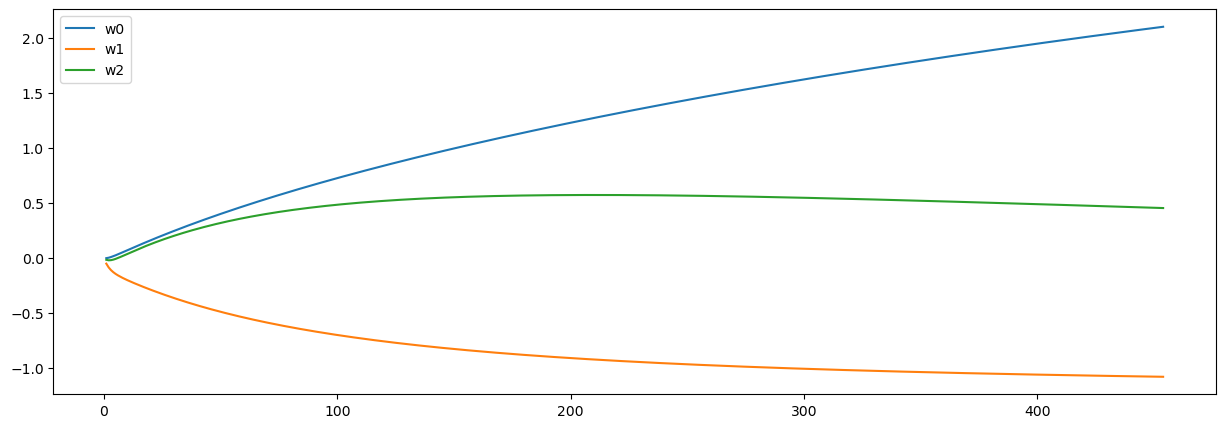

In [30]:
for key in unsep_weight_dict.keys():
    plt.plot(iterations, unsep_weight_dict[key], label='w' + str(key))
plt.legend()

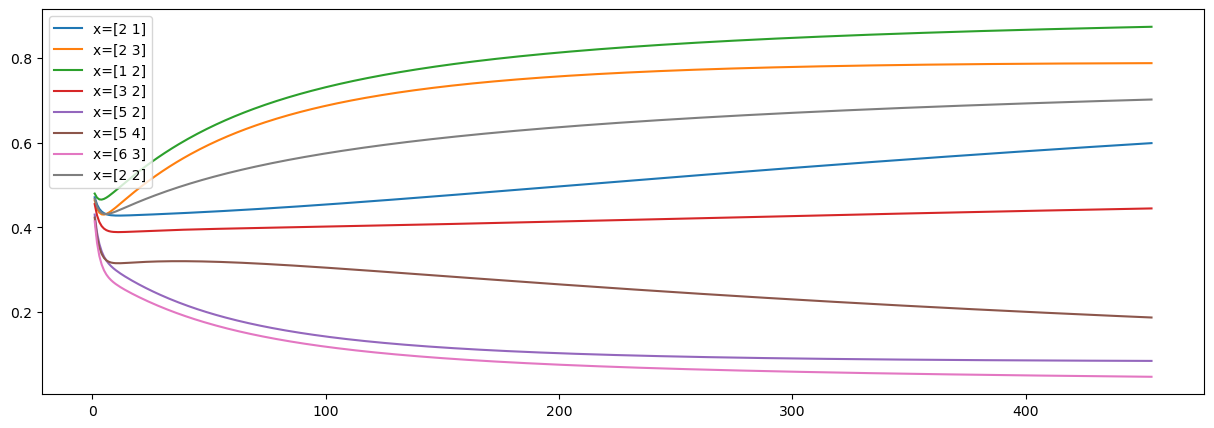

In [31]:
for key in unsep_h_dict.keys():
    plt.plot(iterations, unsep_h_dict[key], label='x='+ str(unsep_X[key][:]))
plt.legend()

**Q:** Usporedite grafikone za slučaj linearno odvojivih i linearno neodvojivih primjera te komentirajte razliku.

### 5. Regularizirana logistička regresija

Trenirajte model logističke regresije na skupu `seven` s različitim faktorima L2-regularizacije, $\alpha\in\{0,1,10,100\}$. Prikažite na dva odvojena grafikona (1) pogrešku unakrsne entropije te (2) L2-normu vektora $\mathbf{w}$ kroz iteracije optimizacijskog algoritma.

In [32]:
from numpy.linalg import norm

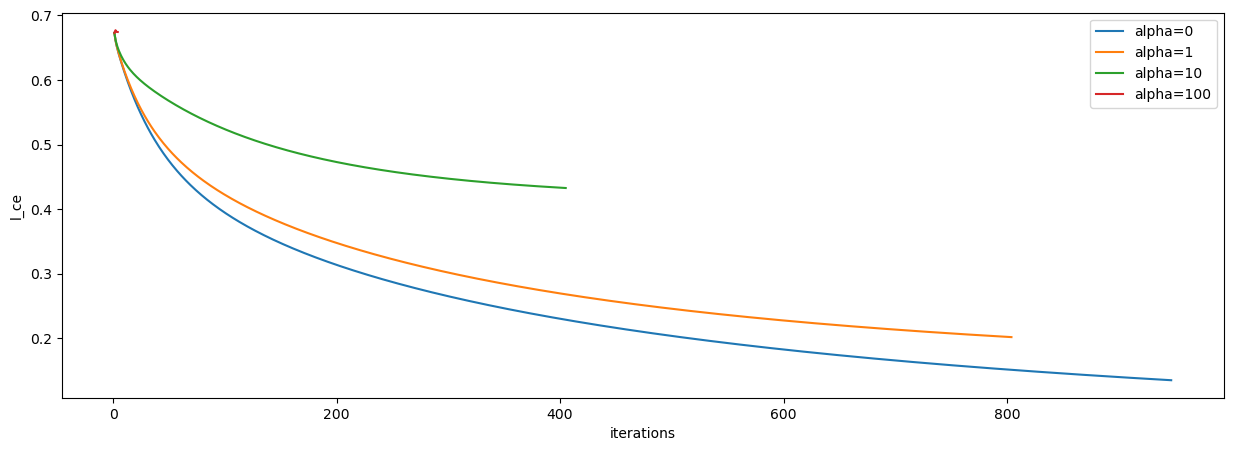

In [33]:
## Vaš kôd ovdje
alphas = [0, 1, 10, 100]
l_ce_alphas = []
L2norms_iterations = []
Phi = PolynomialFeatures(degree=1).fit_transform(seven_X)

for alpha in alphas:
    w, W = lr_train(X=seven_X, y=seven_y, alpha=alpha, trace=True)
    tmp_l_ce = []
    tmp_l2norms = []
    for weights in W:
        tmp_l_ce.append(cross_entropy_error(X=Phi, y=seven_y, w=weights))
        tmp_l2norms.append(np.linalg.norm(weights[1:], ord=2))
    l_ce_alphas.append(tmp_l_ce)
    L2norms_iterations.append(tmp_l2norms)

for i in range(len(alphas)):
    iterations = np.arange(1, len(l_ce_alphas[i]) + 1)
    plt.plot(iterations, l_ce_alphas[i], label='alpha=' + str(alphas[i]))
    plt.legend()
plt.xlabel('iterations')
plt.ylabel('l_ce')
plt.show()

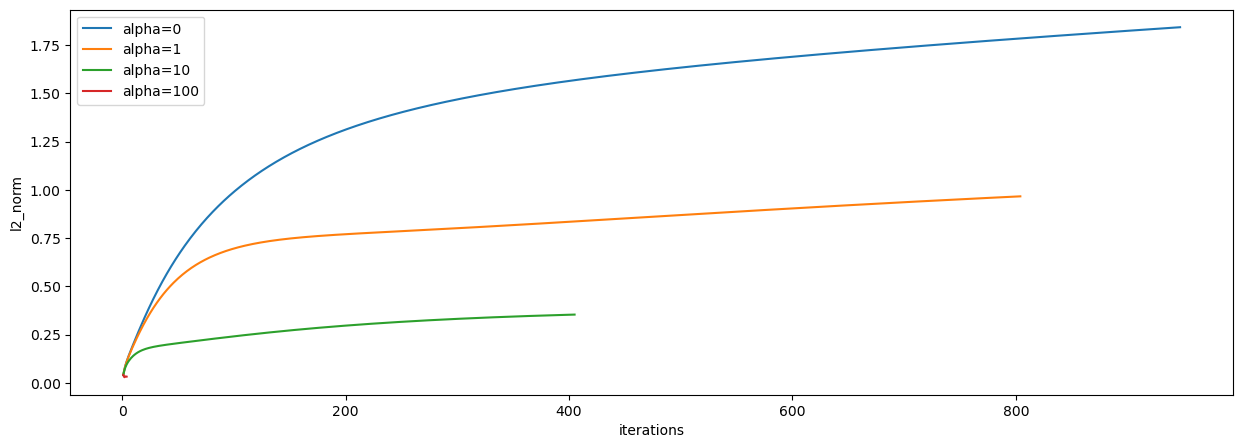

In [34]:
for i in range(len(alphas)):
    iterations = np.arange(1, len(L2norms_iterations[i]) + 1)
    plt.plot(iterations, L2norms_iterations[i], label='alpha=' + str(alphas[i]))
    plt.legend()
plt.xlabel('iterations')
plt.ylabel('l2_norm')
plt.show()

**Q:** Jesu li izgledi krivulja očekivani i zašto?

**Q:** Koju biste vrijednost za $\alpha$ odabrali i zašto?

### 6. Logistička regresija s funkcijom preslikavanja

Proučite funkciju [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html). Generirajte i prikažite dvoklasan skup podataka s ukupno $N=100$ dvodimenzijskih ($n=2)$ primjera, i to sa dvije grupe po klasi (`n_clusters_per_class=2`). Malo je izgledno da će tako generiran skup biti linearno odvojiv, međutim to nije problem jer primjere možemo preslikati u višedimenzijski prostor značajki pomoću klase [`preprocessing.PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html), kao što smo to učinili kod linearne regresije u prvoj laboratorijskoj vježbi. Trenirajte model logističke regresije koristeći za preslikavanje u prostor značajki polinomijalnu funkciju stupnja $d=2$ i stupnja $d=3$. Prikažite dobivene granice između klasa. Možete koristiti svoju implementaciju, ali se radi brzine preporuča koristiti `linear_model.LogisticRegression`. Regularizacijski faktor odaberite po želji.

**NB:** Kao i ranije, za prikaz granice između klasa koristite funkciju `plot_2d_clf_problem`. Funkciji kao argumente predajte izvorni skup podataka, a preslikavanje u prostor značajki napravite unutar poziva funkcije `h` koja čini predikciju, na sljedeći način:

In [35]:
from sklearn.preprocessing import PolynomialFeatures

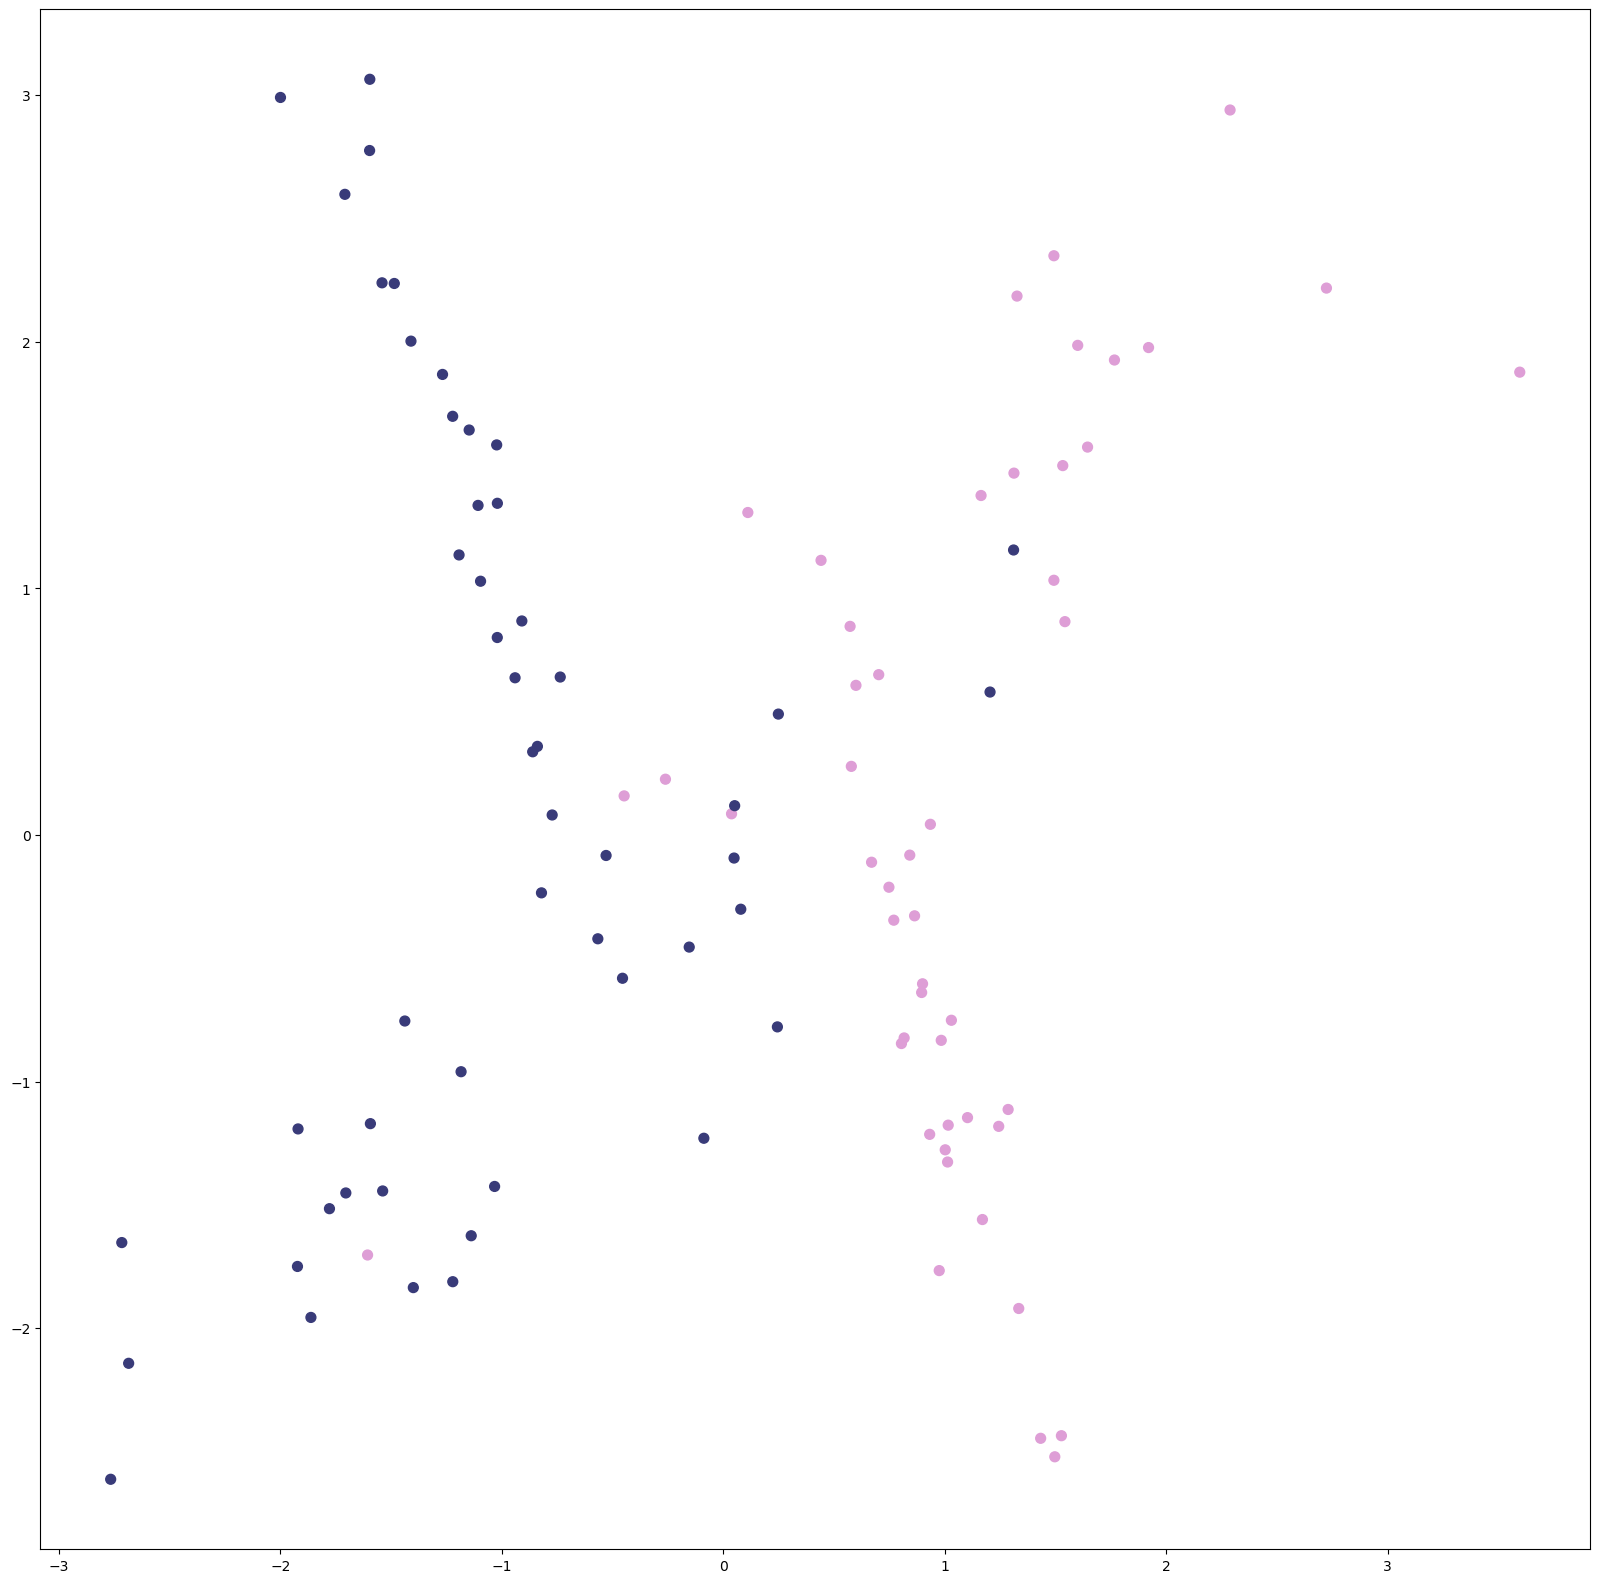

In [42]:
from sklearn.datasets import make_classification

# Vaš kôd ovdje
X, y = make_classification(n_features=2, n_clusters_per_class=2, n_redundant=0)

plot_2d_clf_problem(X, y)

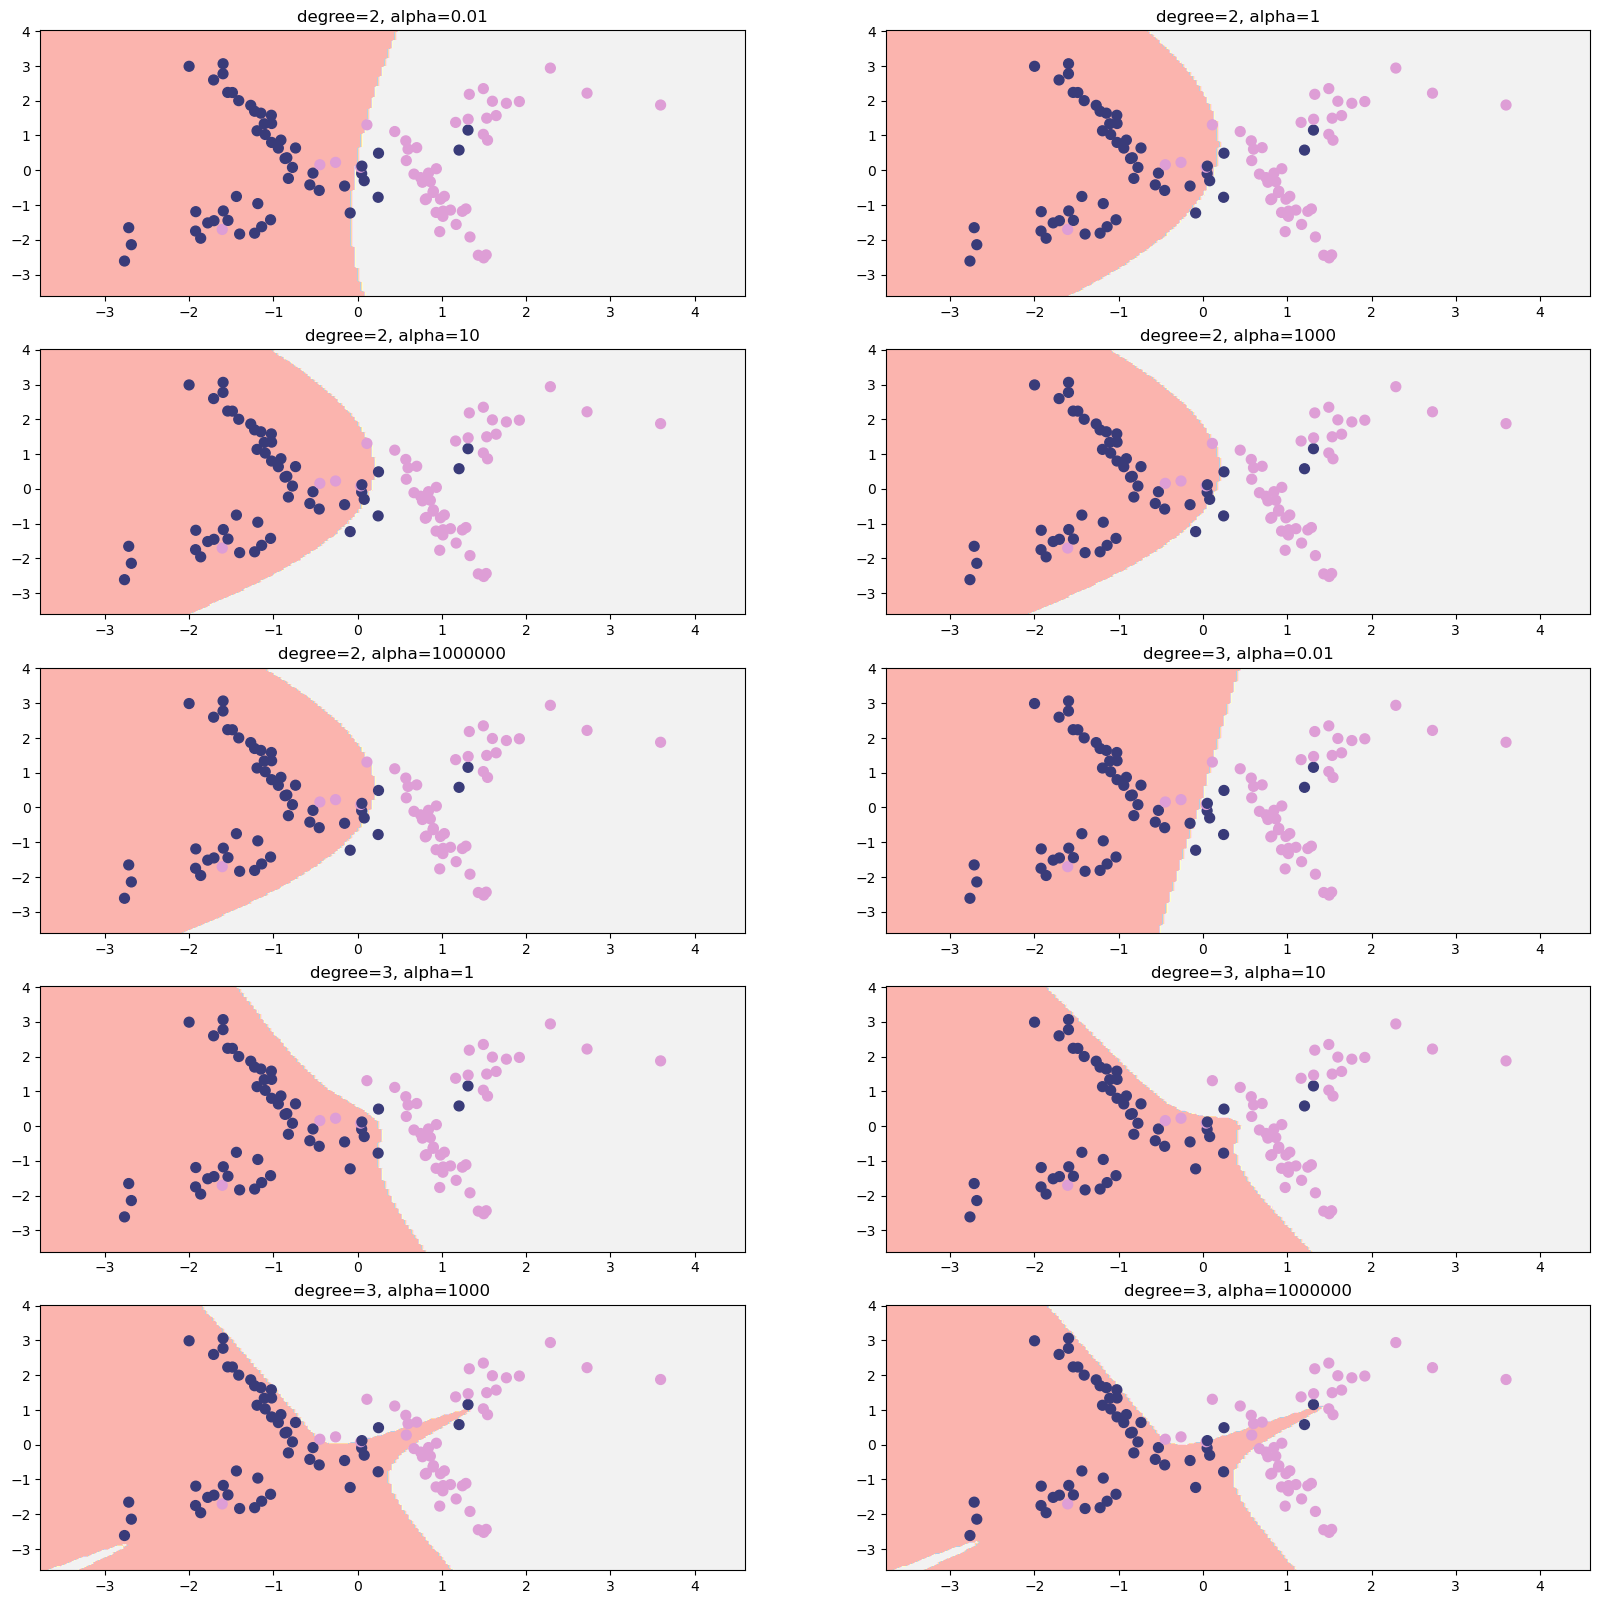

In [43]:
degrees = [2, 3]
alphas = [1e-2, 1, 10, 1000, 1000000] # C = 1 / alpha (veći alpha, manja vrijednost izraza regularizacije)
cnt = 1

for i in range(len(degrees)):
    poly = PolynomialFeatures(degree=degrees[i])
    for j in range(len(alphas)):
        clf = LogisticRegression(max_iter=2000, C=alphas[j]).fit(poly.fit_transform(X), y)
        plt.subplot(5, 2, cnt)
        cnt += 1
        plot_2d_clf_problem(X, y, lambda X : clf.predict(poly.fit_transform(X)))
        plt.title('degree=' + str(degrees[i]) + ", alpha=" + str(alphas[j]))
plt.subplots_adjust(figsize(20,20))
        

**Q:** Koji biste stupanj polinoma upotrijebili i zašto? Je li taj odabir povezan s odabirom regularizacijskog faktora $\alpha$? Zašto?